<a href="https://colab.research.google.com/github/ddcreating/RL_code/blob/main/lab1-bandit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1: Multi-armed Bandits

This lab explores the multi-armed bandit problem, where an agent must choose among multiple options (arms) with unknown reward distributions to maximize its cumulative reward over time.

In [2]:
%pylab inline
from scipy.stats import norm

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Number of bandit arms
K = 5 # @param {"type":"integer"}
# Number of trials (time steps)
T = 100  # @param {"type":"integer"}

# Random seed
seed = 0

Text(0.5, 1.02, 'Unknown Reward Distributions for K Bandits')

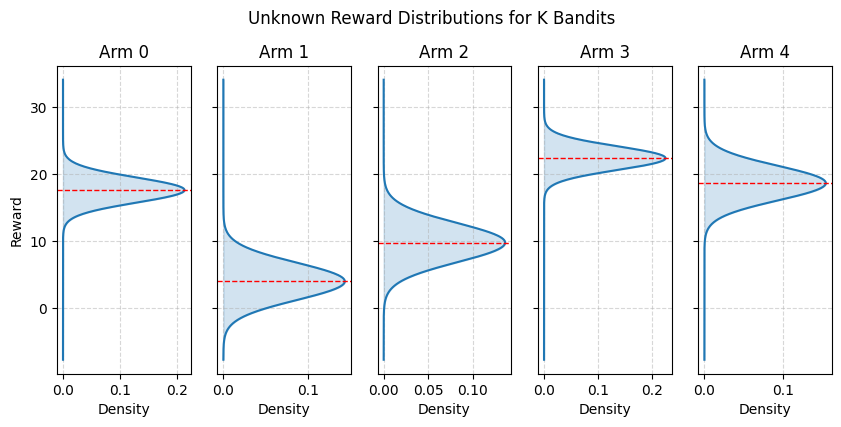

In [4]:
# Stattionary probability distribution for K bandits
np.random.seed(seed)
bandit_mean = 10 * np.random.normal(size=K)
bandit_std = np.random.uniform(1, 3, size=K)




###### Plot disttributions #######
fig, axes = plt.subplots(1, K, figsize=(2*K, 4), sharey=True)

x_min = bandit_mean.min() - 4 * bandit_std.max()
x_max = bandit_mean.max() + 4 * bandit_std.max()
x = np.linspace(x_min, x_max, 500)

for i, ax in enumerate(axes):
    y = norm.pdf(x, loc=bandit_mean[i], scale=bandit_std[i])
    ax.plot(y, x, color="C0")  # vertical orientation
    ax.fill_betweenx(x, 0, y, alpha=0.2, color="C0")
    ax.axhline(bandit_mean[i], color="r", linestyle="--", linewidth=1)  # mean
    ax.set_title(f"Arm {i}")
    ax.set_xlabel("Density")
    if i == 0:
        ax.set_ylabel("Reward")
    ax.grid(True, linestyle="--", alpha=0.5)
plt.suptitle("Unknown Reward Distributions for K Bandits", y=1.02)


Text(0, 0.5, 'Reward')

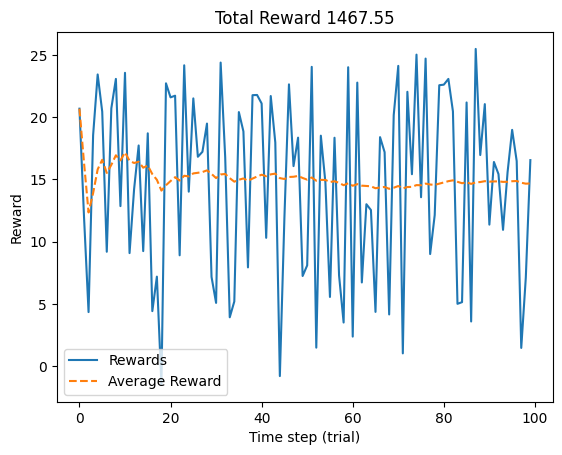

In [5]:
# Rewards
rewards = []

# For T trials, chose a random arm
for t in range(T):
  # Action: Choose a random arm
  a = np.random.randint(0, K-1)

  # Reward
  r = np.random.normal(bandit_mean[a], bandit_std[a])
  rewards.append(r)


# Total reward
total = sum(rewards)
avg_reward = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

# Plot results
plot(rewards, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
title("Rewards")
plt.title("Total Reward %.2f"%total)
xlabel("Time step (trial)")
ylabel("Reward")




## Exercise 1: Implement Your Own Bandit Policy

In the previous cells, we simulated a multi-armed bandit problem and observed the rewards obtained by choosing arms randomly. While this gives us a baseline, a random policy is unlikely to be the most effective way to maximize rewards.

Your task is to implement your own policy for selecting which bandit arm to pull at each time step `t`. The total reward should be higher than the

Text(0, 0.5, 'Reward')

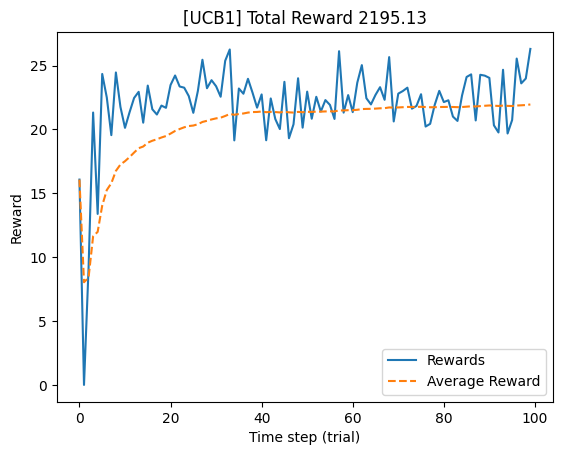

In [12]:
# ------- UCB1 policy -------
rewards = []
counts = np.zeros(K, dtype=int)
estimates = np.zeros(K, dtype=float)

for t in range(T):
    if t < K:
        # Pull each arm once to initialize
        a = t
    else:
        # UCB1: pick arm maximizing mean + sqrt(2*ln(t)/counts)
        # For unvisited arms, counts=0 gives infinite UCB (handled by where counts>0)
        ucb_values = np.where(counts > 0,
                             estimates + np.sqrt(2.0 * np.log(t) / counts),
                             np.inf)
        a = np.argmax(ucb_values)

    # Observe reward
    r = np.random.normal(bandit_mean[a], bandit_std[a])
    rewards.append(r)

    # Update statistics
    counts[a] += 1
    estimates[a] += (r - estimates[a]) / counts[a]

# Plot results
total = sum(rewards)
avg_reward = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)
plot(rewards, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
plt.title(f"[UCB1] Total Reward {total:.2f}")
xlabel("Time step (trial)")
ylabel("Reward")

## Exercise 2: Greedy strategy


1. Implement the greedy strategy: Always choose the arm with the highest estimated average reward.

2. Implement the Epsilon-greedy strategy: with a small probability epsilon, choose a random arm; otherwise, choose the greedy arm.

3. [Optional for 337] Implement Thompson Sampling: Maintain a probability distribution over the expected reward for each arm and sample from these distributions to choose an arm.



Text(0, 0.5, 'Reward')

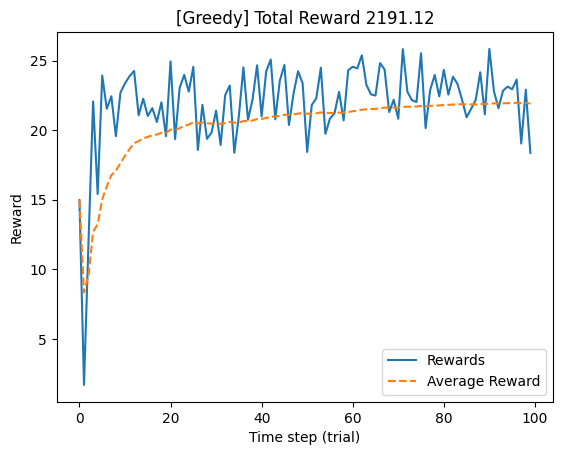

In [8]:
# Exercise 2.1: Implement the greedy strategy
rewards = []
counts = np.zeros(K, dtype=int)      # how many times each arm was pulled
estimates = np.zeros(K, dtype=float) # estimated mean reward of each arm

for t in range(T):
    if t < K:
        # Initialization: pull each arm once
        a = t
    else:
        # Greedy: always choose the arm with highest estimated average reward
        a = int(np.argmax(estimates))

    # Simulate reward from environment
    r = np.random.normal(bandit_mean[a], bandit_std[a])
    rewards.append(r)

    # Update estimates incrementally
    counts[a] += 1
    estimates[a] += (r - estimates[a]) / counts[a]

# Plot results
total = float(np.sum(rewards))
avg_reward = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

plot(rewards, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
plt.title(f"[Greedy] Total Reward {total:.2f}")
xlabel("Time step (trial)")
ylabel("Reward")

Text(0, 0.5, 'Reward')

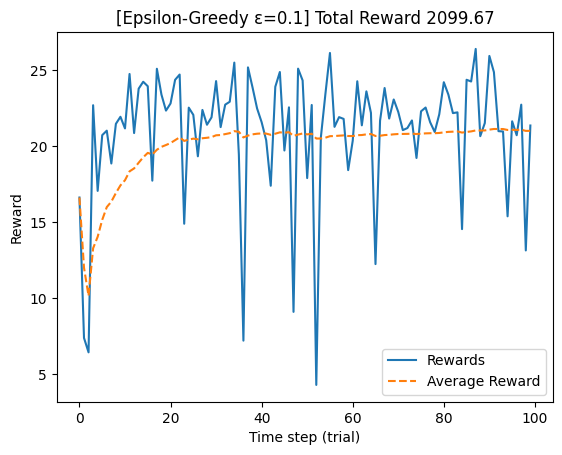

In [9]:
# Implement the Epsilon-greedy strategy
# ------- Exercise 2.2: Epsilon-Greedy strategy -------
epsilon = 0.1   # try epsilon=0.1 and epsilon=0.001 to compare
rewards = []
counts = np.zeros(K, dtype=int)      # count of pulls per arm
estimates = np.zeros(K, dtype=float) # estimated mean reward per arm

for t in range(T):
    if t < K:
        # Initialization: pull each arm once
        a = t
    else:
        if np.random.rand() < epsilon:
            # Exploration: choose a random arm
            a = np.random.randint(K)
        else:
            # Exploitation: choose the best estimated arm
            a = int(np.argmax(estimates))

    # Simulate reward
    r = np.random.normal(bandit_mean[a], bandit_std[a])
    rewards.append(r)

    # Update estimates incrementally
    counts[a] += 1
    estimates[a] += (r - estimates[a]) / counts[a]

# Plot results
total = float(np.sum(rewards))
avg_reward = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

plot(rewards, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
plt.title(f"[Epsilon-Greedy ε={epsilon}] Total Reward {total:.2f}")
xlabel("Time step (trial)")
ylabel("Reward")

Text(0, 0.5, 'Reward')

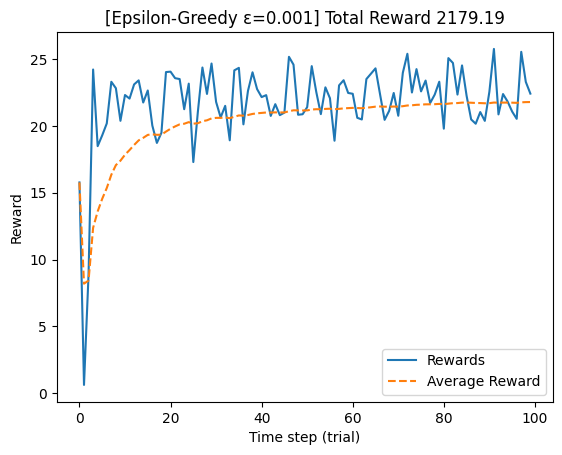

In [10]:
# Implement the Epsilon-greedy strategy
# ------- Exercise 2.2: Epsilon-Greedy strategy -------
epsilon = 0.001   # try epsilon=0.1 and epsilon=0.001 to compare
rewards = []
counts = np.zeros(K, dtype=int)      # count of pulls per arm
estimates = np.zeros(K, dtype=float) # estimated mean reward per arm

for t in range(T):
    if t < K:
        # Initialization: pull each arm once
        a = t
    else:
        if np.random.rand() < epsilon:
            # Exploration: choose a random arm
            a = np.random.randint(K)
        else:
            # Exploitation: choose the best estimated arm
            a = int(np.argmax(estimates))

    # Simulate reward
    r = np.random.normal(bandit_mean[a], bandit_std[a])
    rewards.append(r)

    # Update estimates incrementally
    counts[a] += 1
    estimates[a] += (r - estimates[a]) / counts[a]

# Plot results
total = float(np.sum(rewards))
avg_reward = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

plot(rewards, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
plt.title(f"[Epsilon-Greedy ε={epsilon}] Total Reward {total:.2f}")
xlabel("Time step (trial)")
ylabel("Reward")

Text(0, 0.5, 'Reward')

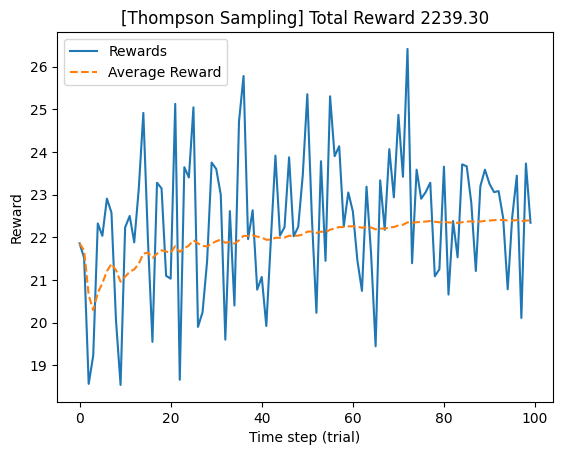

In [11]:
# ------- Exercise 2.3: Thompson Sampling (Gaussian mean) -------
# Assumptions:
# - Rewards per arm are approximately Normal with unknown mean.
# - Use a Normal prior over the mean: mu ~ N(mu0, tau2).
# - Assume observation noise variance = sigma2 (set to a constant).
#   (In the true sim, each arm has different std, but we don't know it; using a fixed sigma2 works well in practice.)

rewards = []

K_ = K
mu0 = 0.0                # prior mean
tau2 = 10.0              # prior variance (bigger => more uncertainty)
sigma2 = 1.0             # assumed observation noise variance

mu_post  = np.ones(K_) * mu0         # posterior mean per arm
var_post = np.ones(K_) * tau2        # posterior variance per arm

for t in range(T):
    # 1) Sample a plausible mean for each arm from its posterior
    sampled_means = np.random.normal(mu_post, np.sqrt(var_post))
    a = int(np.argmax(sampled_means))

    # 2) Pull the arm, observe reward from the environment
    r = np.random.normal(bandit_mean[a], bandit_std[a])
    rewards.append(r)

    # 3) Conjugate posterior update for Normal-Normal with known variance sigma2
    # Prior:   mu ~ N(mu_post[a], var_post[a])
    # Likeli.: r  ~ N(mu, sigma2)
    # Poster.: mu | r ~ N(mu_new, var_new), where
    #   var_new = 1 / (1/var_post + 1/sigma2)
    #   mu_new  = var_new * (mu_post/var_post + r/sigma2)
    inv_var = (1.0 / var_post[a]) + (1.0 / sigma2)
    new_var = 1.0 / inv_var
    new_mu  = new_var * (mu_post[a] / var_post[a] + r / sigma2)

    mu_post[a]  = new_mu
    var_post[a] = new_var

# Plot results
total = float(np.sum(rewards))
avg_reward = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

plot(rewards, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
plt.title(f"[Thompson Sampling] Total Reward {total:.2f}")
xlabel("Time step (trial)")
ylabel("Reward")


# Questions
After compleing the excercises, answer the following questions:

1. In the epsilon-greedy strategy, compare ε = 0.1 and ε = 0.001. What are the advantages of using a larger ε?
2. If the reward distribution changes smoothly over time, is a purely greedy strategy still effective?
3. How does the choice of ε affect the balance between exploration and exploitation in the long run?  
4. Suppose the number of arms increases significantly. How might this change the effectiveness of the epsilon-greedy strategy?  

Answer:
1. A larger ε (like 0.1) makes the agent explore more, so it can find better arms and adapt if the rewards change. The cost is that it sometimes picks worse arms, but it is safer than getting stuck too early.

2. If the reward distribution changes over time, a purely greedy strategy is not very effective. It will keep choosing the arm that looked best in the past and may miss the new best arm. In our fixed case it worked well, but in a changing environment some exploration (like epsilon-greedy) is needed.

3. In the long run, ε controls the trade-off between exploration and exploitation. A larger ε makes the agent explore more, which helps it avoid getting stuck on a suboptimal arm and adapt if the environment changes, but it also lowers the average reward because it often picks worse arms. A smaller ε makes the agent exploit more, which gives higher and more stable rewards if the best arm is found, but it risks missing better options or failing to adapt to changes.

4. When the number of arms gets much larger, ε-greedy becomes less effective because random exploration is spread too thin across many arms. It takes longer to find the good ones, so the average reward is lower. To improve this, we can adjust ε over time or use smarter methods like UCB or Thompson Sampling.